Monte Carlo simulation of passengers boarding an airplane. 
Seat rows are 1m apart
distance from gate to first row of seats is 25m
Assuming the plane is 100% full. All seats need to be filled.
People are randomly seated at a walking speed of 0.5 m/s 
Distance between people in boarding queue is 0.5m.
There is aisle interference from people putting luggage away which takes 30s each
There is seat interference from a person sitting in aisle seat when their seat is the window seat causing a swap. Swaps take 15s 

Simulate 100 random boardings 
Passengers start in boarding queue in random order with randomly assigned seats
Find the average boarding time (time from first passenger to start walking to their seat to the last passenger being seated

Hints:
 area from gate to back of plane as an array where each element describes 0.5 m length of space and make the simulation in time steps of 1 s. 
 moving the first passenger in the queue to first position in array, then try move the second passenger in the queue, then third etc... until the last.
Always check that the passenger can move (= no other passenger in the position in the array to which passenger wants to move). 
Once passenger is at position where he/she should be seated keep him/her in that position the time required by the passenger to put luggage in luggage compartment and get seated.
If a passenger is seated at window, check whether aisle seat already occupied, and if so, keep passenger in that position the additional time required to cover the swap
Keep track of number of seated passangers and where they are seated.
Stop simulation when all passengers are seated.


[5, 43, 83, 35, 48, 67, 25, 17, 60, 20, 88, 57, 2, 65, 49, 72, 30, 61, 41, 15, 64, 51, 62, 9, 50, 6, 32, 18, 28, 77, 33, 55, 10, 81, 38, 19, 91, 87, 85, 96, 99, 8, 58, 69, 84, 92, 42, 76, 3, 14, 59, 39, 24, 46, 80, 13, 74, 1, 79, 34, 82, 12, 27, 78, 40, 11, 7, 75, 98, 71, 37, 29, 44, 4, 16, 97, 21, 66, 94, 93, 45, 63, 95, 54, 86, 47, 73, 70, 90, 36, 31, 89, 53, 22, 56, 23, 26, 52, 0, 68]
Person 97 is assigned to seat 6. Column 2, Row 2
Person 39 is assigned to seat 44. Column 4, Row 11
Aisle Interference
Seat Interference
Person 93 is assigned to seat 84. Column 4, Row 21
Aisle Interference
Seat Interference
Person 81 is assigned to seat 36. Column 4, Row 9
Seat Interference
Person 63 is assigned to seat 49. Column 1, Row 13
Aisle Interference
Person 12 is assigned to seat 68. Column 4, Row 17
Aisle Interference
Seat Interference
Person 75 is assigned to seat 26. Column 2, Row 7
Person 29 is assigned to seat 18. Column 2, Row 5
Person 20 is assigned to seat 61. Column 1, Row 16
Aisle I

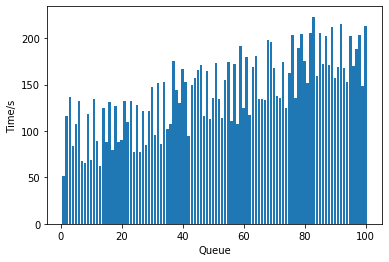

In [103]:
import numpy as np
import scipy as sci 
from matplotlib import pyplot as plt 
import random
from random import choice
import sys


#init
airplane = []
random.seed(random.randint(1,25000))

seatstaken = 0
N = 100 #number of people
if N % 4 != 0:
    print('ERROR: N not divisible by 4.')
    sys.exit()
seats = np.zeros(N)
times = np.zeros(N)
velocity = 0.5 #0.5 m/s speed
distance = 25 #25m from gate (first person) to first seat row (seat no 1,2,3,4)
queuedist = 0.5 #0.5m between people in boarding queue
rowdist = 1 #1m between seat rows 
#so it takes (25m + (0.5*arrayindex) + (1*rowindexnumber)) * 0.5m/s time to get from queue pos to seat row
#var form: (distance + (queuedist * i) + (rowdist * rownumber starting from 0)) * velocity 
# + 30s for aisle interference 
# if person[i]_row > person[i-1]_row then +30s 
# + 15 secs for seat interference 
# if person[i] and person[i-1] == same row and person[i-1] in column 2 or 3 then + 15s

#constructing airplane
for i in range (0,N):
    airplane.append(i)

queue = []
j=1
while j < N+1: #randomisizing the queue
    p = random.randint(1,N)
    if p not in queue:
        queue.append(p)
        j+=1
        
        
r= random.sample(range(0,N),N)
print(r)
for i in range(0,N):
    #r = random.randint(0,N-1)
    #s = random.randrange(0,11)
    #print(r[i])
    #seats[r] = queue[i]
    times[i] = times[i] + ((distance +(queuedist*i)+(rowdist * np.floor(r[i]/4)))/ velocity)
    if seats[r[i]] == 0:
        seats[r[i]] = queue[i]
    print('Person %d is assigned to seat %d. Column %d, Row %d' % (queue[i], r[i]+1,(r[i] % 4)+1, np.floor(r[i]/4)+1))
    if np.floor(r[i]/4) > np.floor(r[i-1]/4):
        times[i]= times[i] + 30
        print('Aisle Interference')
    if np.floor(r[i]/4) == np.floor(r[i-1]/4) and (r[i] %4) == 2 or (r[i] %4) == 3:
        times[i] = times[i] +15
        print('Seat Interference')





    

#print(airplane)
#print(random.randint(1,25))
#print(choice(airplane))
print('QUEUE') 
print(queue)
print('SEATS')
print(seats)
print('TIMES')
print(times)
print('Avg time to Board and find seat is %d seconds' %(np.mean(times)))
print('Std Dev is %d seconds' %(np.std(times)))


plt.bar(np.sort(queue), times)
plt.xlabel('Queue')
plt.ylabel('Time/s')
#count, bins, ignored = plt.hist(times,100,density=True)
plt.show()
#print(queue[0])
#print(len(lis))
#for i in range(1,101):
#    print('i = %d count = %d'% (i, lis.count(i)))
#for i in range(0,100):
    #print('Seat %d is assigned to person %d. Person %d is in column %d row %d'% (i+1, lis[i],lis[i], (i % 4)+1, np.floor(i/4)+1 ))

In [55]:
airplane = []
random.seed(1)


seats = []

for i in range(1,26):
    seats.append(0)
    
#constructing airplane
for i in range (1,101):
    airplane.append(i)

    
print(seats)
print(random.randint(1,25))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5


In [128]:
for i in range(0,100):
    print('i = %d,  %d is in column= %d, i is in row %d'%(i+1,i+1, (i % 4)+1, np.floor(i/4)+1))


i = 1,  1 is in column= 1, i is in row 1
i = 2,  2 is in column= 2, i is in row 1
i = 3,  3 is in column= 3, i is in row 1
i = 4,  4 is in column= 4, i is in row 1
i = 5,  5 is in column= 1, i is in row 2
i = 6,  6 is in column= 2, i is in row 2
i = 7,  7 is in column= 3, i is in row 2
i = 8,  8 is in column= 4, i is in row 2
i = 9,  9 is in column= 1, i is in row 3
i = 10,  10 is in column= 2, i is in row 3
i = 11,  11 is in column= 3, i is in row 3
i = 12,  12 is in column= 4, i is in row 3
i = 13,  13 is in column= 1, i is in row 4
i = 14,  14 is in column= 2, i is in row 4
i = 15,  15 is in column= 3, i is in row 4
i = 16,  16 is in column= 4, i is in row 4
i = 17,  17 is in column= 1, i is in row 5
i = 18,  18 is in column= 2, i is in row 5
i = 19,  19 is in column= 3, i is in row 5
i = 20,  20 is in column= 4, i is in row 5
i = 21,  21 is in column= 1, i is in row 6
i = 22,  22 is in column= 2, i is in row 6
i = 23,  23 is in column= 3, i is in row 6
i = 24,  24 is in column= 4, 

In [206]:
 for i in range(1,N+1):
        #r = random.randint(0,N-1)
        print(i)
        #seats[r] = queue[i]
        #if r not in queue:
            #seats[r] = queue[i]

1
2
3
4
5
6
7
8
9
10


In [143]:
import numpy as np
import scipy as sci 
from matplotlib import pyplot as plt 
import random
from random import choice
import sys


#init
airplane = []
random.seed(random.randint(1,25000))

seatstaken = 0
AI=0
SI=0
S = 1 #1000 boarding sims
N = 100 #number of people
if N % 4 != 0:
    print('ERROR: N not divisible by 4.')
    sys.exit()
seats = np.zeros(N)
times = np.zeros(N)
Totaltime =0
Avgtime = 0
Stdtime=0
totaltimes = np.zeros(S)
Avgtimes = np.zeros(S)
Stdtimes = np.zeros(S)
velocity = 0.5 #0.5 m/s speed
distance = 25 #25m from gate (first person) to first seat row (seat no 1,2,3,4)
queuedist = 0.5 #0.5m between people in boarding queue
rowdist = 1 #1m between seat rows 
#so it takes (25m + (0.5*arrayindex) + (1*rowindexnumber)) * 0.5m/s time to get from queue pos to seat row
#var form: (distance + (queuedist * i) + (rowdist * rownumber starting from 0)) * velocity 
# + 30s for aisle interference 
# if person[i]_row > person[i-1]_row then +30s 
# + 15 secs for seat interference 
# if person[i] and person[i-1] == same row and person[i-1] in column 2 or 3 then + 15s

#constructing airplane
for i in range (0,N):
    airplane.append(i)

queue = []
j=1
while j < N+1: #randomisizing the queue
    p = random.randint(1,N)
    if p not in queue:
        queue.append(p)
        j+=1
        
        
print(queue)
#print(r)
k = 0
while k < S:
    
    for i in range(0,N):
        r= random.sample(range(0,N),N)
        times[i] +=  (distance / velocity) + (rowdist * np.floor(r[i]/4))/velocity #time to get to seat row 
        if np.floor(r[i]/4) > np.floor(r[i-1]/4):
            times[i]= times[i] + 30
            #print('Aisle Interference')
            AI += 1
        if np.floor(r[i]/4) == np.floor(r[i-1]/4) and (r[i] %4) == 2 or (r[i] %4) == 3:
            times[i] = times[i] +15
            #print('Seat Interference')
            SI +=1
        Totaltime += times[i]
        print(Totaltime)
       
    #Totaltime = np.sum(times) #total time per plane for all passengers to board and find a seat 
    Avgtime = np.mean(times) #avg time for a person to board and find seat
    Stdtime = np.std(times) #std for person to board and find seat
    times = np.zeros(N)
    totaltimes[k] = Totaltime
    Avgtimes[k] = Avgtime
    Stdtimes[k] = Stdtime

    #print('Total time to board plane %d: %f seconds' %(k,Totaltime))
    #print('Total time to board plane %d: %f mins' %(k,Totaltime/60))
    #print('Total time to board plane %d: %f hours' %(k,Totaltime/3600))
    
        
     
    #print(k)
    k+=1
        
print('SIM FOR %d PEOPLE BOARDING %d PLANES' %(N, S))
#print(totaltimes)
print('Average total boarding time:%f seconds or %f hours' % (np.mean(totaltimes),np.mean(totaltimes)/3600 ))
print('Standard Deviation in total boarding time:%f seconds or %f hours' % (np.std(totaltimes), np.std(totaltimes)/3600))
print('Average time for passenger to board and find seat is %f seconds' %(np.mean(Avgtimes)))
print('Standard deviation in time taken for a person to board and find a seat is: %f seconds' %(np.mean(Stdtimes)))
    



[24, 87, 55, 6, 16, 62, 57, 52, 15, 93, 90, 67, 77, 43, 48, 20, 85, 71, 25, 98, 88, 97, 18, 39, 41, 44, 30, 74, 7, 1, 83, 72, 17, 65, 94, 54, 82, 22, 80, 40, 47, 9, 84, 13, 53, 34, 99, 27, 3, 31, 64, 92, 37, 35, 59, 81, 100, 11, 19, 38, 96, 28, 89, 5, 49, 95, 63, 51, 69, 12, 66, 14, 60, 79, 8, 70, 68, 56, 76, 33, 10, 36, 42, 21, 45, 32, 61, 4, 26, 75, 73, 2, 58, 46, 50, 29, 86, 78, 23, 91]
122.0
174.0
236.0
320.0
398.0
484.0
544.0
681.0
789.0
922.0
1036.0
1158.0
1214.0
1282.0
1402.0
1479.0
1529.0
1583.0
1695.0
1760.0
1881.0
1946.0
2012.0
2106.0
2177.0
2269.0
2391.0
2517.0
2584.0
2686.0
2812.0
2928.0
3053.0
3119.0
3215.0
3339.0
3419.0
3490.0
3563.0
3704.0
3839.0
3915.0
4025.0
4081.0
4151.0
4211.0
4267.0
4389.0
4465.0
4527.0
4631.0
4733.0
4814.0
4898.0
4966.0
5077.0
5131.0
5200.0
5326.0
5392.0
5517.0
5583.0
5637.0
5718.0
5780.0
5917.0
6029.0
6143.0
6284.0
6349.0
6411.0
6508.0
6558.0
6666.0
6782.0
6874.0
6969.0
7027.0
7083.0
7139.0
7252.0
7356.0
7466.0
7516.0
7608.0
7666.0
7739.0
7863.0
8